# Image Compression with SVD

In this lab we will:

- Use `NumPy` linear algebra package to perform image compression using SVD

## Packages

First, we load the `NumPy` *library* and other libraries such as `matplotlib` into memory.

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

## Helper functions


*   `image_show` function will help us to plot an image in the notebook. It will take as a numpy array representing the image to plot as a string and the title of the image as a string.
*   `rgb_gray` is a function that convert a RGB image into a gray scale image. It will take as an input the filepath of the image as a string and will return the grayscale image as a numpy array.
*    `axes_display` fucntion will create a grid of images. 

In [ ]:
def image_show(X, title):
    img = plt.imshow(X)
    img.set_cmap('gray')
    plt.axis("off")
    plt.title(title)
    plt.show()
def rgb_gray(filename):
    A = imread(filename)
    return np.mean(A, -1)
def axes_display(axes, row_idx, cols_idx, img, image_rank):
    axes[row_idx, cols_idx].imshow(img, cmap='gray')
    axes[row_idx, cols_idx].set_title(f'Rank r={image_rank}', fontweight ="bold")
    axes[row_idx, cols_idx].axis('off')



1.   Convert the RGB image into a grayscale image using the `rgb_gray` function, store the array representing the grayscale into variable `img`, and then display the image using the `image_show` function.





In [ ]:
img = rgb_gray("flowers.jpg")
print("Matrix Dimensions: ", img.shape)
print("Matrix Rank: ", np.linalg.matrix_rank(img))

In [ ]:
image_show(img, "Original image")

2.   Perform SVD into the gray scale image `img` using the `np.linalg.svd` command.



In [ ]:
U, S, VT = np.linalg.svd(img)
Sigma = np.diag(S)

3. Here we will reconstruct a compressed image for each value $k$ in the list `ranks`. For reconstruction with rank $k$ we take the first $k$ columns of $U$, the top-left $k$ by $k$ matrix of $\Sigma$ and first $k$ columns of $V$ (or first $k$ rows of $V^T$), as shown in this image:
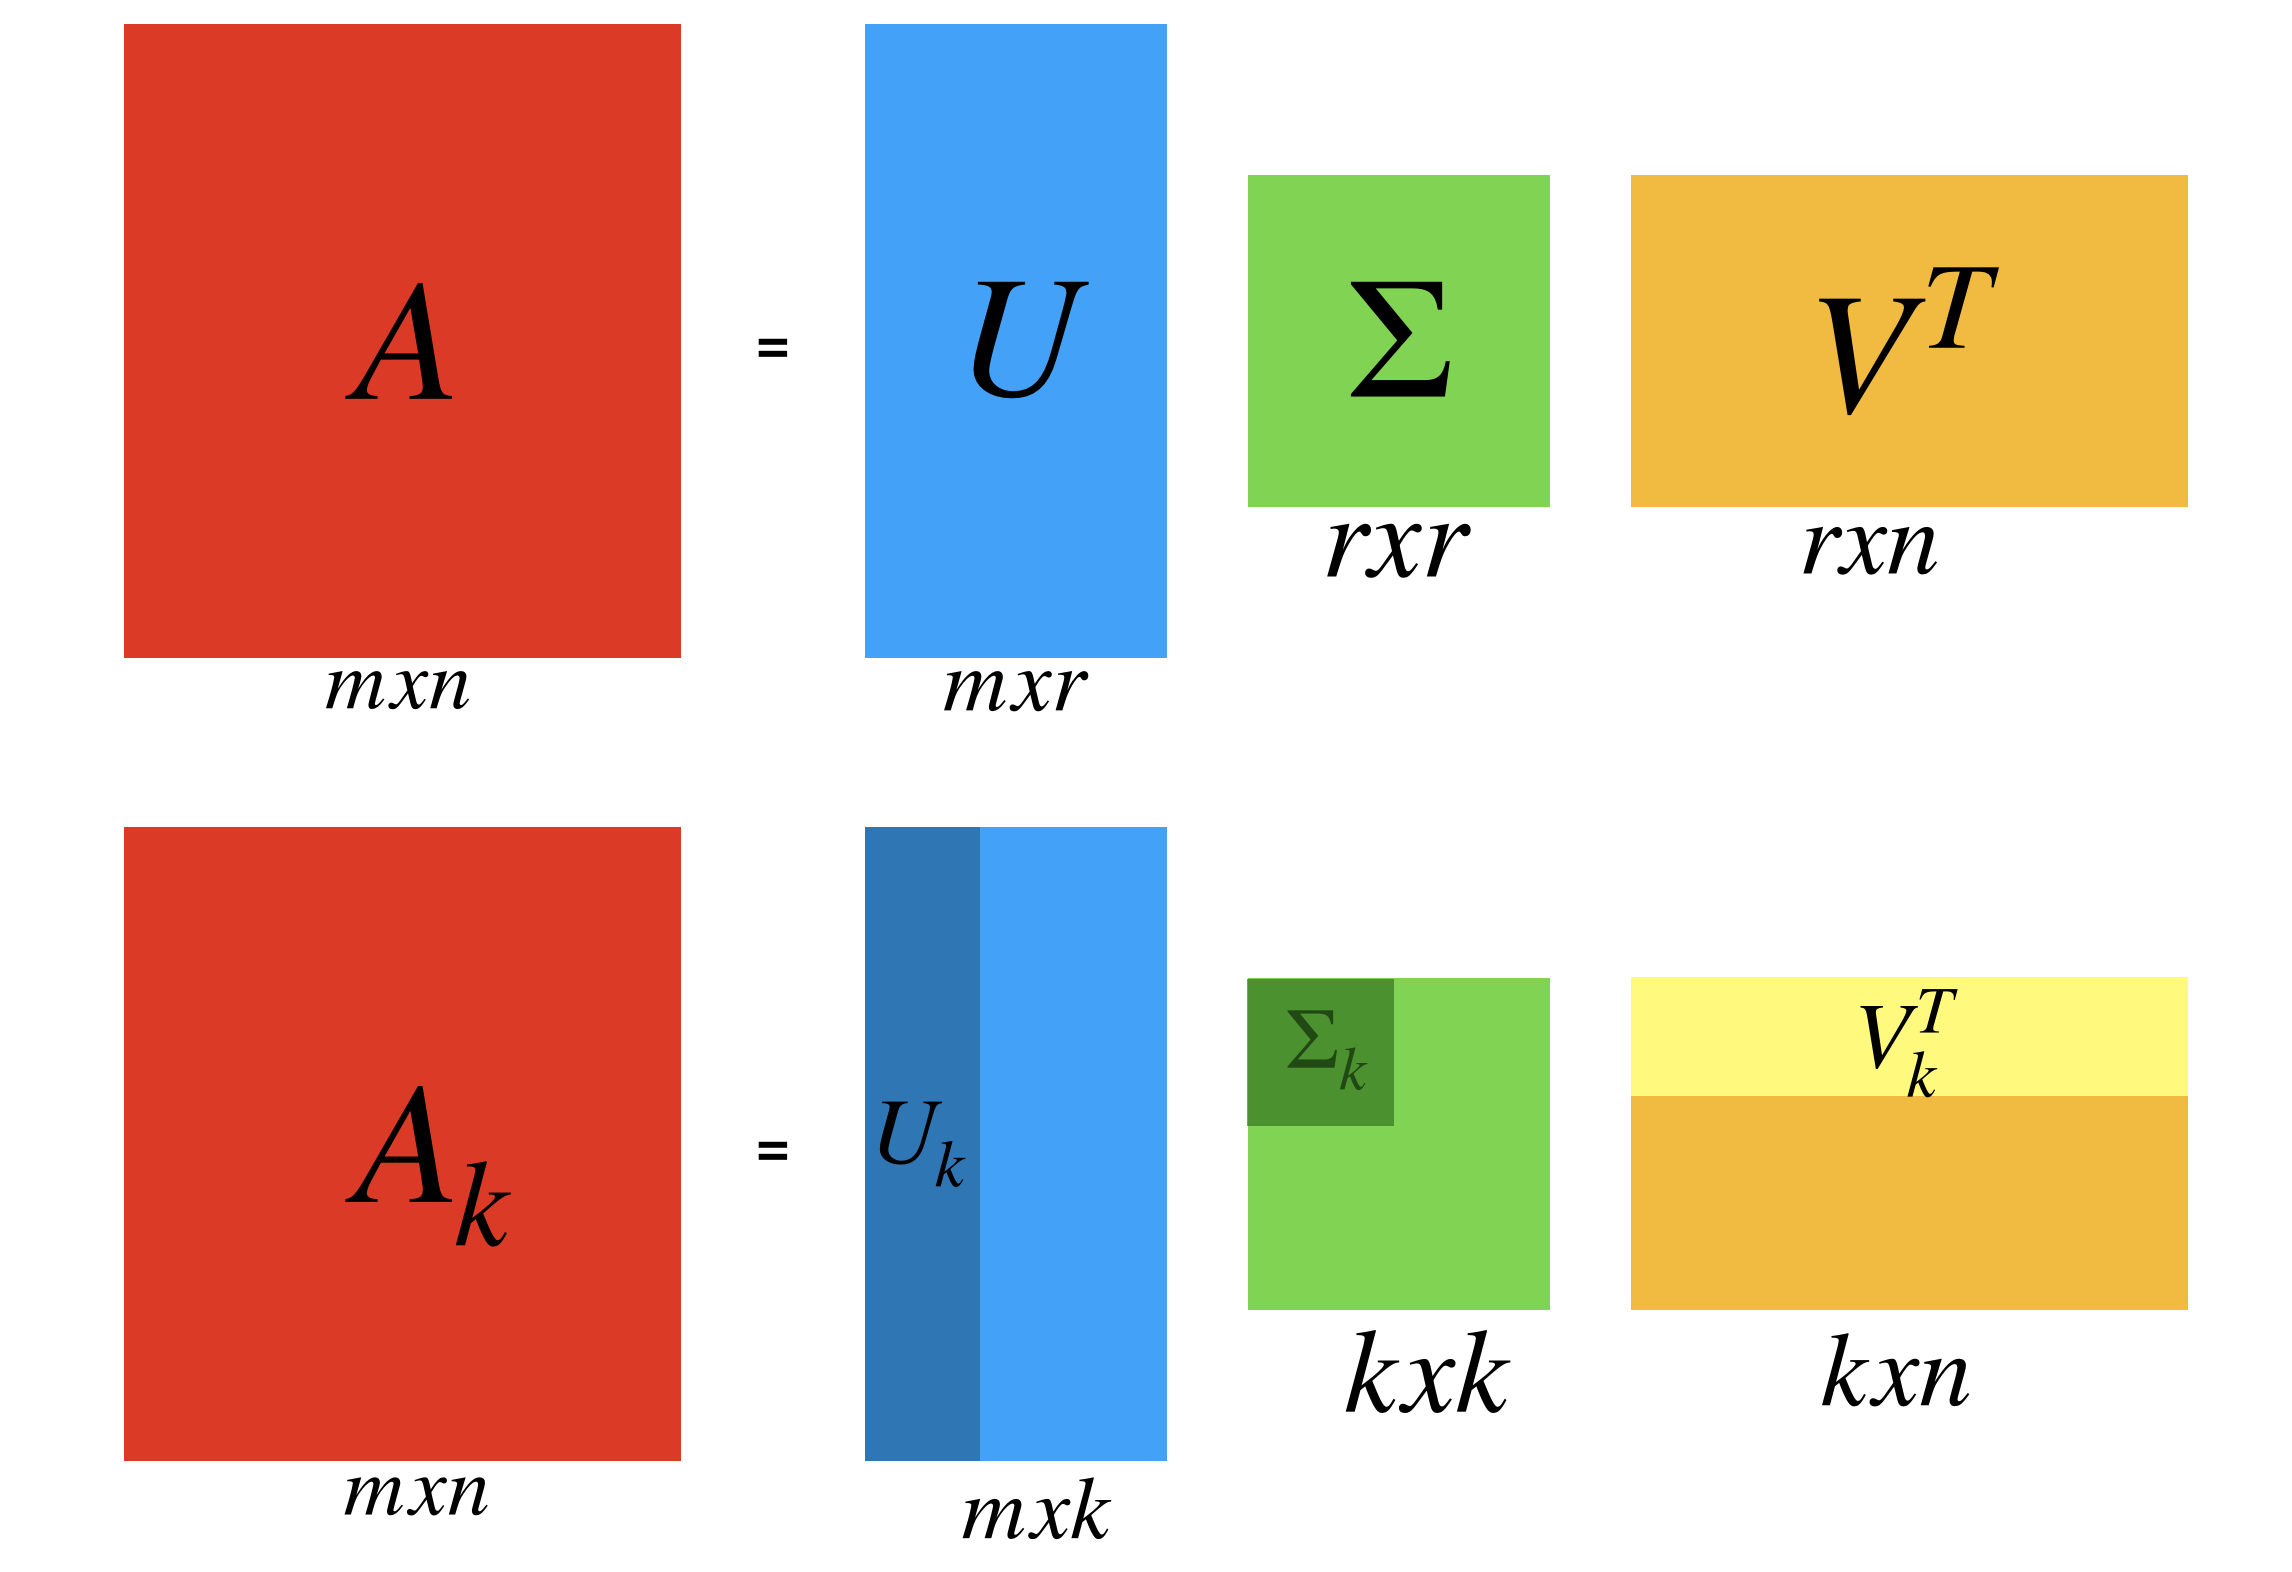

After reconstruction, plot every image using the `image_show` function.


In [ ]:
# define a grid of number_of_rows x number_of_cols
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
ranks = [5, 10, 25, 50, 75, 100]
r_cnt = 0

for i in range(2):
    for j in range(3):
        k = ranks[r_cnt]
        image_approx = U[:,:k]@Sigma[:k,:k]@VT[:k,:]
        axes_display(axes=axes, row_idx=i, cols_idx=j, img=image_approx, image_rank=ranks[r_cnt])
        r_cnt += 1
plt.show()

Now, lets plot the values of $\sigma$'s in a y-log scale.  

In [ ]:
plt.plot(S)
plt.yscale("log")
plt.xlabel("$r$")
plt.ylabel("$\sigma_r$")
plt.title("Singular Values")

Finally, we will plot the cummulative sum for every singular value $\sigma$. 

In [ ]:
plt.plot(np.cumsum(S)/np.sum(S))
plt.xlabel("$r$")
plt.ylabel("$\sum_{i}^{r}\sigma_i / {\sum_{i}^{m}\sigma_i}$")
plt.title("Singular Values: Cummulative Sum")